In [6]:
import pandas as pd
import numpy as np

csv_path = "C:/Users/82103/Desktop/multimodal/OHT/oht_merged_output.csv"  # 병합된 CSV 파일 경로
df = pd.read_csv(csv_path)

df.head()

,subset,subfolder,json_filename,bin_filename,device_id,collection_date,collection_time,state,temp_max_value,temp_max_x,...,ex_humidity,ex_illuminance,NTC,PM10,PM2.5,PM1.0,CT1,CT2,CT3,CT4
0,train,1,train\01\oht01_0826_203735.json,oht01_0826_203735.bin,oht01,08-26,20:37:35,0,45.58,130.0,...,36.0,511.0,27.0,20.0,12.0,8.0,2.30,1.35,0.35,0.35
1,train,1,train\01\oht01_0826_203736.json,oht01_0826_203736.bin,oht01,08-26,20:37:36,0,45.56,128.0,...,35.0,514.0,27.0,20.0,12.0,7.0,2.80,0.94,0.64,0.50
2,train,1,train\01\oht01_0826_203737.json,oht01_0826_203737.bin,oht01,08-26,20:37:37,0,45.53,130.0,...,35.0,515.0,27.1,20.0,12.0,8.0,2.86,0.86,0.68,0.48
3,train,1,train\01\oht01_0826_203738.json,oht01_0826_203738.bin,oht01,08-26,20:37:38,0,45.48,128.0,...,35.0,513.0,27.1,21.0,12.0,7.0,2.22,1.18,0.68,0.44
4,train,1,train\01\oht01_0826_203739.json,oht01_0826_203739.bin,oht01,08-26,20:37:39,0,45.43,129.0,...,36.0,523.0,27.1,21.0,11.0,7.0,2.41,1.38,0.60,0.50


C:\Users\82103\anaconda3\envs\tf37\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


검증 데이터 정확도: 0.933095803642122

검증 데이터 분류 리포트:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2584
           1       0.92      0.95      0.93      1088
           2       0.87      0.91      0.89      1050
           3       0.78      0.98      0.87       330

    accuracy                           0.93      5052
   macro avg       0.89      0.94      0.91      5052
weighted avg       0.94      0.93      0.93      5052


테스트 데이터 정확도: 0.966547901821061

테스트 데이터 분류 리포트:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2724
           1       0.96      0.93      0.94       995
           2       0.92      0.94      0.93      1003
           3       0.93      0.89      0.91       330

    accuracy                           0.97      5052
   macro avg       0.95      0.94      0.94      5052
weighted avg       0.97      0.97      0.97      5052



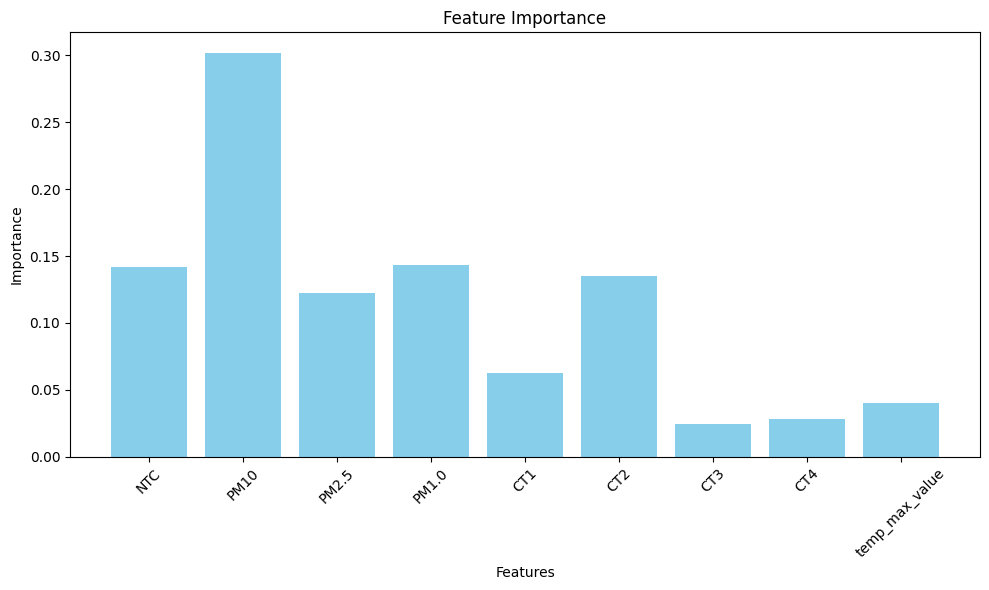

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. CSV 파일 읽기
csv_path = "C:/Users/82103/Desktop/multimodal/AGV/agv_merged_output.csv"  # 병합된 CSV 파일 경로
df = pd.read_csv(csv_path)

# 2. 데이터 전처리
# 결측값 처리: 숫자형은 평균값으로, 범주형은 최빈값으로 채움
df.fillna(df.mean(), inplace=True)
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding: 범주형 데이터를 숫자형으로 변환
label_encoder = LabelEncoder()
if "device_id" in df.columns:
    df["device_id"] = label_encoder.fit_transform(df["device_id"])

# 특징 스케일링: 숫자형 열을 정규화
features = ["NTC", "PM10", "PM2.5", "PM1.0", "CT1", "CT2", "CT3", "CT4", "temp_max_value"]
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# 3. 데이터셋 분리: train, test, val
train_df = df[df["subset"] == "train"]
test_df = df[df["subset"] == "test"]
val_df = df[df["subset"] == "val"]

# 학습 데이터
X_train = train_df[features]
y_train = train_df["state"]

# 검증 데이터
X_val = val_df[features]
y_val = val_df["state"]

# 테스트 데이터
X_test = test_df[features]
y_test = test_df["state"]

# 4. 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. 검증 데이터 평가
y_val_pred = model.predict(X_val)
print("검증 데이터 정확도:", accuracy_score(y_val, y_val_pred))
print("\n검증 데이터 분류 리포트:")
print(classification_report(y_val, y_val_pred))

# 6. 테스트 데이터 평가
y_test_pred = model.predict(X_test)
print("\n테스트 데이터 정확도:", accuracy_score(y_test, y_test_pred))
print("\n테스트 데이터 분류 리포트:")
print(classification_report(y_test, y_test_pred))

# 7. 특징 중요도 시각화
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color="skyblue")
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\82103\anaconda3\envs\tf37\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


검증 데이터 정확도: 0.9482429855625171

검증 데이터 분류 리포트:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1555
           1       0.89      0.94      0.91       888
           2       0.95      0.95      0.95       898
           3       0.95      0.95      0.95       330

    accuracy                           0.95      3671
   macro avg       0.94      0.95      0.95      3671
weighted avg       0.95      0.95      0.95      3671


테스트 데이터 정확도: 0.9476981748842277

테스트 데이터 분류 리포트:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1641
           1       0.87      0.95      0.91       849
           2       0.94      0.97      0.95       851
           3       0.98      0.92      0.95       330

    accuracy                           0.95      3671
   macro avg       0.95      0.94      0.94      3671
weighted avg       0.95      0.95      0.95      3671



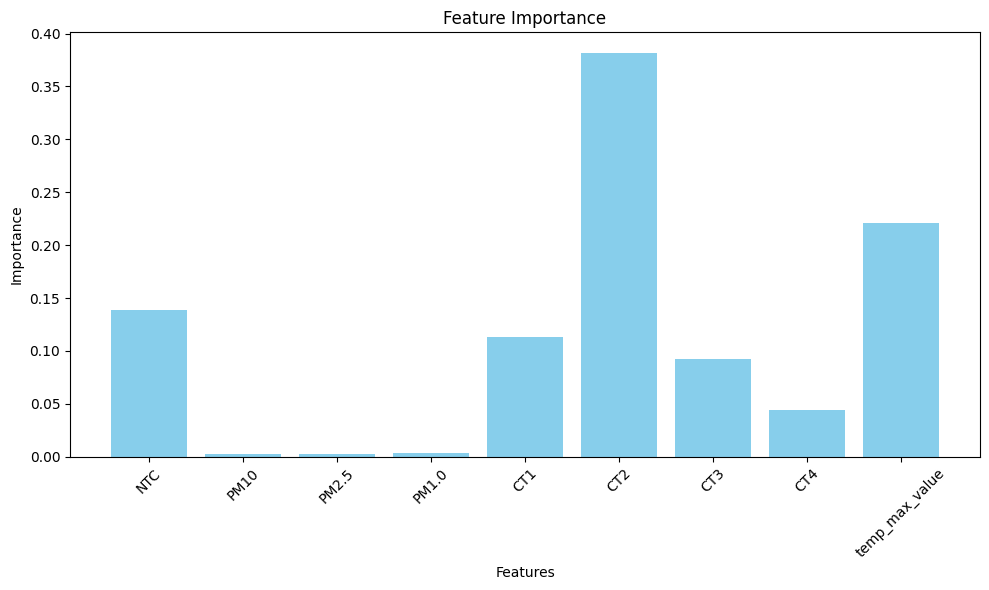

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. CSV 파일 읽기
csv_path = "C:/Users/82103/Desktop/multimodal/OHT/oht_merged_output.csv"  # 병합된 CSV 파일 경로
df = pd.read_csv(csv_path)

# 2. 데이터 전처리
# 결측값 처리: 숫자형은 평균값으로, 범주형은 최빈값으로 채움
df.fillna(df.mean(), inplace=True)
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding: 범주형 데이터를 숫자형으로 변환
label_encoder = LabelEncoder()
if "device_id" in df.columns:
    df["device_id"] = label_encoder.fit_transform(df["device_id"])

# 특징 스케일링: 숫자형 열을 정규화
features = ["NTC", "PM10", "PM2.5", "PM1.0", "CT1", "CT2", "CT3", "CT4", "temp_max_value"]
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# 3. 데이터셋 분리: train, test, val
train_df = df[df["subset"] == "train"]
test_df = df[df["subset"] == "test"]
val_df = df[df["subset"] == "val"]

# 학습 데이터
X_train = train_df[features]
y_train = train_df["state"]

# 검증 데이터
X_val = val_df[features]
y_val = val_df["state"]

# 테스트 데이터
X_test = test_df[features]
y_test = test_df["state"]

# 4. 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. 검증 데이터 평가
y_val_pred = model.predict(X_val)
print("검증 데이터 정확도:", accuracy_score(y_val, y_val_pred))
print("\n검증 데이터 분류 리포트:")
print(classification_report(y_val, y_val_pred))

# 6. 테스트 데이터 평가
y_test_pred = model.predict(X_test)
print("\n테스트 데이터 정확도:", accuracy_score(y_test, y_test_pred))
print("\n테스트 데이터 분류 리포트:")
print(classification_report(y_test, y_test_pred))

# 7. 특징 중요도 시각화
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color="skyblue")
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\82103\anaconda3\envs\tf37\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


검증 데이터 정확도: 0.9410753181244984

검증 데이터 분류 리포트:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      4139
           1       0.91      0.95      0.93      1976
           2       0.92      0.93      0.92      1948
           3       0.86      0.97      0.91       660

    accuracy                           0.94      8723
   macro avg       0.92      0.95      0.93      8723
weighted avg       0.94      0.94      0.94      8723


테스트 데이터 정확도: 0.950131835377737

테스트 데이터 분류 리포트:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4365
           1       0.86      0.95      0.90      1844
           2       0.95      0.91      0.93      1854
           3       0.95      0.91      0.93       660

    accuracy                           0.95      8723
   macro avg       0.94      0.93      0.94      8723
weighted avg       0.95      0.95      0.95      8723



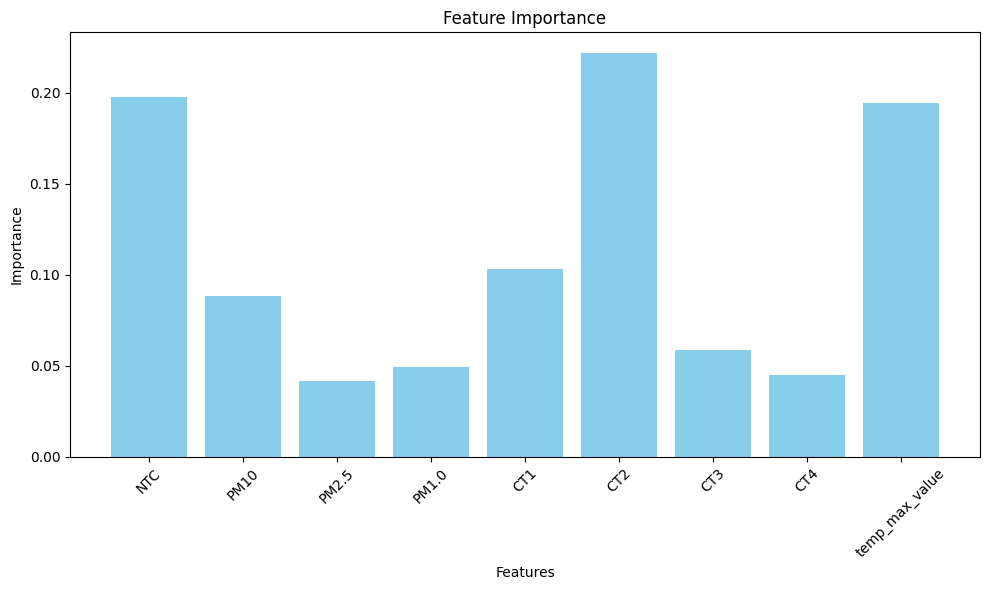

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. CSV 파일 읽기 및 병합
csv_path_1 = "C:/Users/82103/Desktop/multimodal/OHT/oht_merged_output.csv"
csv_path_2 = "C:/Users/82103/Desktop/multimodal/AGV/agv_merged_output.csv"

# 두 파일 읽기
df1 = pd.read_csv(csv_path_1)
df2 = pd.read_csv(csv_path_2)

# 병합
df = pd.concat([df1, df2], ignore_index=True)

# 2. 데이터 전처리
# 결측값 처리: 숫자형은 평균값으로, 범주형은 최빈값으로 채움
df.fillna(df.mean(), inplace=True)
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding: 범주형 데이터를 숫자형으로 변환
label_encoder = LabelEncoder()
if "device_id" in df.columns:
    df["device_id"] = label_encoder.fit_transform(df["device_id"])

# 특징 스케일링: 숫자형 열을 정규화
features = ["NTC", "PM10", "PM2.5", "PM1.0", "CT1", "CT2", "CT3", "CT4", "temp_max_value"]
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# 3. 데이터셋 분리: train, test, val
train_df = df[df["subset"] == "train"]
test_df = df[df["subset"] == "test"]
val_df = df[df["subset"] == "val"]

# 학습 데이터
X_train = train_df[features]
y_train = train_df["state"]

# 검증 데이터
X_val = val_df[features]
y_val = val_df["state"]

# 테스트 데이터
X_test = test_df[features]
y_test = test_df["state"]

# 4. 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. 검증 데이터 평가
y_val_pred = model.predict(X_val)
print("검증 데이터 정확도:", accuracy_score(y_val, y_val_pred))
print("\n검증 데이터 분류 리포트:")
print(classification_report(y_val, y_val_pred))

# 6. 테스트 데이터 평가
y_test_pred = model.predict(X_test)
print("\n테스트 데이터 정확도:", accuracy_score(y_test, y_test_pred))
print("\n테스트 데이터 분류 리포트:")
print(classification_report(y_test, y_test_pred))

# 7. 특징 중요도 시각화
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color="skyblue")
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
